In [1]:
from keras.layers import Dense, Input
from keras.models import Model

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
encodingDim = 32
inputImg = Input(shape=(784,))
encodedIP = Dense(encodingDim,activation ='relu')(inputImg)
decodedIP = Dense(784,activation='sigmoid')(encodedIP)

In [3]:
autoencoder = Model(input = inputImg,output = decodedIP)
#autoencoder takes the input image and goves the output decoded img

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [4]:
encoder = Model(input = inputImg,output= encodedIP)
encodedShaped = Input(shape=(encodingDim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(input = encodedShaped, output = decoder_layer(encodedShaped))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  after removing the cwd from sys.path.


In [14]:
autoencoder.compile(optimizer='adadelta', loss = 'binary_crossentropy')

In [15]:
from keras.datasets import mnist
#load the digits dataset called mnist

In [16]:
import numpy as np

In [17]:
(xtrain,_),(xtest,_) = mnist.load_data()

In [18]:
xtrain = xtrain.astype('float32')/255
xtest = xtest.astype('float32')/255
#normalising xtrain and xtest

print (xtrain.shape)
xtrain = xtrain.reshape(len(xtrain), np.prod(xtrain.shape[1:]))
print (xtrain.shape)
#flattening 28x28 into 784

#//y for xtest
xtest = xtest.reshape(len(xtest),np.prod(xtest.shape[1:]))

(60000, 28, 28)
(60000, 784)


## Training the autoencoder

In [19]:
autoencoder.fit(xtrain,xtrain,epochs=12,verbose=1,batch_size=256,shuffle=True,
                validation_data=(xtest,xtest))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 4s 74us/step - loss: 0.0928 - val_loss: 0.0916
Epoch 2/12
60000/60000 [==============================] - 4s 65us/step - loss: 0.0928 - val_loss: 0.0916
Epoch 3/12
60000/60000 [==============================] - 4s 61us/step - loss: 0.0928 - val_loss: 0.0916
Epoch 4/12
60000/60000 [==============================] - 4s 66us/step - loss: 0.0928 - val_loss: 0.0916
Epoch 5/12
60000/60000 [==============================] - 4s 63us/step - loss: 0.0928 - val_loss: 0.0916
Epoch 6/12
60000/60000 [==============================] - 4s 72us/step - loss: 0.0928 - val_loss: 0.0916
Epoch 7/12
60000/60000 [==============================] - 5s 85us/step - loss: 0.0928 - val_loss: 0.0916
Epoch 8/12
60000/60000 [==============================] - 4s 71us/step - loss: 0.0928 - val_loss: 0.0916
Epoch 9/12
60000/60000 [==============================] - 4s 63us/step - loss: 0.0928 - val_loss: 0.0916
Epoch

In [20]:
encodedImgs = encoder.predict(xtest)
decodedImgs = decoder.predict(encodedImgs)

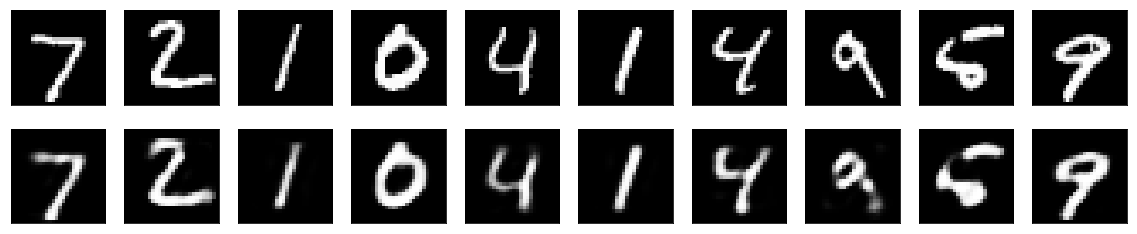

In [21]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
n = 10
plt.figure(figsize = (20,4))
for i in range(n):
    #displaying original
    ax = plt.subplot(2,n,i+1)
    plt.imshow(xtest[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #displaying predictions
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decodedImgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show() 